In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_X = train.drop(labels = 'label', axis = 1)
train_Y = train['label']

In [5]:
train_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train_X.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [7]:
train_X = train_X.values.reshape(42000,28,28,1)
test = test.values.reshape(28000, 28,28,1)
train_Y = train_Y.values.reshape(42000,1)

In [8]:
print(train_X.shape)
print(train_Y.shape)

(42000, 28, 28, 1)
(42000, 1)


In [9]:
train_Y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

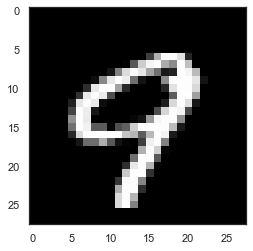

In [10]:
sns.set(style='white', context='notebook', palette='deep')
index = 100
plt.imshow(train_X[index][:,:,0], cmap = 'gray')
#plt.title("y = ", train_Y.item(index))

In [11]:
train_X = train_X/255
test = test/255

In [12]:
from sklearn.preprocessing import OneHotEncoder

onh = OneHotEncoder()
train_Y = onh.fit_transform(train_Y).toarray()

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
train_Y.shape

(42000, 10)

In [14]:
#Test/train split
from sklearn.model_selection import train_test_split

X = train_X
Y = train_Y
random_seed = 2
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.1, random_state=random_seed)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization

In [18]:
#Setting up our model
#Model 1
#Submission 1
model = Sequential([
    Conv2D(filters = 32, kernel_size = (4,4), activation = "relu", strides = (1,1), padding = "same", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), padding = "same"),
    Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", strides = (1,1), padding = "same"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax"),
])

In [19]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [20]:
history = model.fit(train_X, train_Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 76s 2ms/sample - loss: 0.1795 - accuracy: 0.9455 - val_loss: 0.0781 - val_accuracy: 0.9750
Epoch 2/20
37800/37800 [==============================] - 56s 1ms/sample - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.0624 - val_accuracy: 0.9814
Epoch 3/20
37800/37800 [==============================] - 56s 1ms/sample - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0490 - val_accuracy: 0.9845
Epoch 4/20
37800/37800 [==============================] - 56s 1ms/sample - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0370 - val_accuracy: 0.9893
Epoch 5/20
37800/37800 [==============================] - 56s 1ms/sample - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 6/20
37800/37800 [==============================] - 57s 2ms/sample - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0677 - val_accuracy: 0.9838
Epoch 7/20
37800/37800 [==============================] -

In [21]:
#model.evaluate(val_X, val_Y, batch_size = 64)

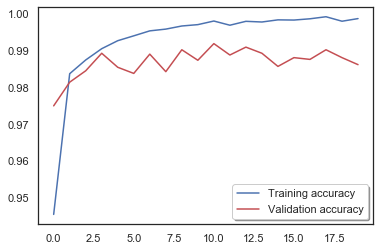

In [34]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

Output = 3


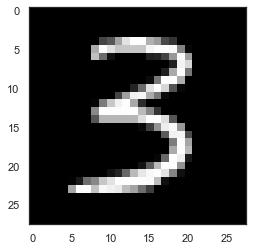

In [30]:
y_predict = model.predict_classes(test)
m = plt.imshow(test[9,:,:,0], cmap = "gray")
print("Output = " +str(y_predict[9]))

In [36]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)),
                         "Label": y_predict})
submissions.to_csv("submission.csv", index=False, header=True)

In [39]:
#Setting up our model
#LeNet-5 Adaptaion

model = Sequential([
    Conv2D(filters = 6, kernel_size = (5,5), activation = "relu", strides = (1,1), padding = "valid", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "valid"),
    Conv2D(filters = 16, kernel_size = (5,5), activation = "relu", strides = (1,1), padding = "valid"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(120, activation = "relu"),
    Dense(84, activation = "relu"),
    Dense(10, activation = "softmax"),
])

In [40]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [41]:
history = model.fit(train_X, train_Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 50s 1ms/sample - loss: 0.2379 - accuracy: 0.9251 - val_loss: 0.0929 - val_accuracy: 0.9695
Epoch 2/20
37800/37800 [==============================] - 32s 854us/sample - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0617 - val_accuracy: 0.9802
Epoch 3/20
37800/37800 [==============================] - 34s 910us/sample - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0546 - val_accuracy: 0.9836
Epoch 4/20
37800/37800 [==============================] - 32s 840us/sample - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.0536 - val_accuracy: 0.9831
Epoch 5/20
37800/37800 [==============================] - 32s 845us/sample - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0472 - val_accuracy: 0.9862
Epoch 6/20
37800/37800 [==============================] - 32s 856us/sample - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0506 - val_accuracy: 0.9831
Epoch 7/20
37800/37800 [=======================

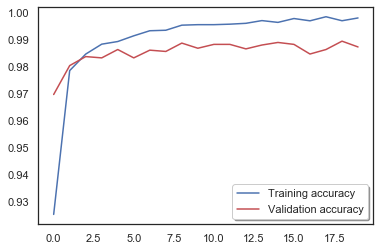

In [42]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [16]:
#Setting up our model
#Model 1 with BatchNorm and some other changes
model = Sequential([
    Conv2D(filters = 32, kernel_size = (4,4), activation = "relu", strides = (1,1), padding = "same", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), padding = "same"),
    BatchNormalization(axis = 1),
    Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", strides = (1,1), padding = "same"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation = "relu"),
    BatchNormalization(),
    Dense(10, activation = "softmax"),
])

In [17]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [18]:
history = model.fit(train_X, train_Y, epochs = 30, validation_data = (val_X, val_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 112s 3ms/sample - loss: 0.1343 - accuracy: 0.9604 - val_loss: 0.0658 - val_accuracy: 0.9821
Epoch 2/30
37800/37800 [==============================] - 96s 3ms/sample - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.0754 - val_accuracy: 0.9769
Epoch 3/30
37800/37800 [==============================] - 97s 3ms/sample - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0522 - val_accuracy: 0.9840
Epoch 4/30
37800/37800 [==============================] - 97s 3ms/sample - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0656 - val_accuracy: 0.9824
Epoch 5/30
37800/37800 [==============================] - 98s 3ms/sample - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0454 - val_accuracy: 0.9893
Epoch 6/30
37800/37800 [==============================] - 98s 3ms/sample - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0600 - val_accuracy: 0.9848
Epoch 7/30
37800/37800 [==============================] 

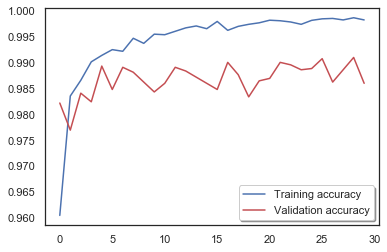

In [19]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [23]:
#Setting up our model
#LeNet-5 Adaptaion with Dropout

model = Sequential([
    Conv2D(filters = 6, kernel_size = (5,5), activation = "relu", strides = (1,1), padding = "valid", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "valid"),
    Dropout(0.25),
    Conv2D(filters = 16, kernel_size = (5,5), activation = "relu", strides = (1,1), padding = "valid"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(120, activation = "relu"),
    Dropout(0.25),
    Dense(84, activation = "relu"),
    Dropout(0.25),
    Dense(10, activation = "softmax"),
])

In [25]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [26]:
history = model.fit(train_X, train_Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 43s 1ms/sample - loss: 0.4106 - accuracy: 0.8681 - val_loss: 0.1127 - val_accuracy: 0.9655
Epoch 2/20
37800/37800 [==============================] - 30s 799us/sample - loss: 0.1468 - accuracy: 0.9560 - val_loss: 0.0751 - val_accuracy: 0.9783
Epoch 3/20
37800/37800 [==============================] - 30s 796us/sample - loss: 0.1092 - accuracy: 0.9670 - val_loss: 0.0572 - val_accuracy: 0.9819
Epoch 4/20
37800/37800 [==============================] - 30s 791us/sample - loss: 0.0892 - accuracy: 0.9734 - val_loss: 0.0603 - val_accuracy: 0.9829
Epoch 5/20
37800/37800 [==============================] - 30s 795us/sample - loss: 0.0767 - accuracy: 0.9769 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 6/20
37800/37800 [==============================] - 31s 818us/sample - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.0558 - val_accuracy: 0.9845
Epoch 7/20
37800/37800 [=======================

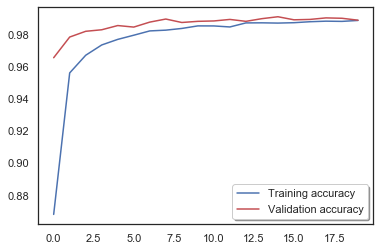

In [27]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [18]:
#Setting up our model
#LeNet-5 Adaptaion with BatchNorm
#Submission 2

model = Sequential([
    Conv2D(filters = 6, kernel_size = (5,5), activation = "relu", strides = (1,1), padding = "valid", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = "valid"),
    BatchNormalization(axis = 1),
    Conv2D(filters = 16, kernel_size = (5,5), activation = "relu", strides = (1,1), padding = "valid"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    BatchNormalization(),
    Dense(120, activation = "relu"),
    BatchNormalization(),
    Dense(84, activation = "relu"),
    BatchNormalization(),
    Dense(10, activation = "softmax"),
])

In [19]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [30]:
history = model.fit(train_X, train_Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 49s 1ms/sample - loss: 0.2071 - accuracy: 0.9369 - val_loss: 0.0848 - val_accuracy: 0.9752
Epoch 2/20
37800/37800 [==============================] - 34s 909us/sample - loss: 0.0823 - accuracy: 0.9738 - val_loss: 0.0654 - val_accuracy: 0.9795
Epoch 3/20
37800/37800 [==============================] - 36s 948us/sample - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.0544 - val_accuracy: 0.9814
Epoch 4/20
37800/37800 [==============================] - 37s 971us/sample - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 5/20
37800/37800 [==============================] - 36s 952us/sample - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.0478 - val_accuracy: 0.9845
Epoch 6/20
37800/37800 [==============================] - 38s 1ms/sample - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0378 - val_accuracy: 0.9905
Epoch 7/20
37800/37800 [=========================

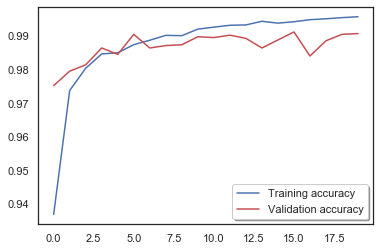

In [31]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [20]:
history = model.fit(X, Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 42000 samples, validate on 4200 samples
Epoch 1/20
42000/42000 [==============================] - 72s 2ms/sample - loss: 0.2146 - accuracy: 0.9353 - val_loss: 0.1377 - val_accuracy: 0.9583
Epoch 2/20
42000/42000 [==============================] - 50s 1ms/sample - loss: 0.0788 - accuracy: 0.9757 - val_loss: 0.0338 - val_accuracy: 0.9912
Epoch 3/20
42000/42000 [==============================] - 45s 1ms/sample - loss: 0.0605 - accuracy: 0.9813 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 4/20
42000/42000 [==============================] - 46s 1ms/sample - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0248 - val_accuracy: 0.9914
Epoch 5/20
42000/42000 [==============================] - 52s 1ms/sample - loss: 0.0451 - accuracy: 0.9850 - val_loss: 0.0184 - val_accuracy: 0.9936
Epoch 6/20
42000/42000 [==============================] - 47s 1ms/sample - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0179 - val_accuracy: 0.9926
Epoch 7/20
42000/42000 [==============================] -

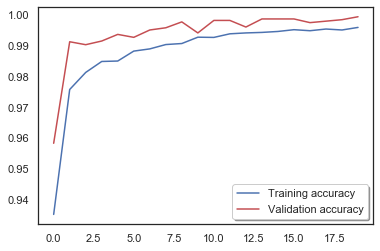

In [21]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [23]:
y_predict = model.predict_classes(test)
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)),
                         "Label": y_predict})
submissions.to_csv("submission1.csv", index=False, header=True)

In [ ]:
#Setting up our model
#VGG Adaptaion with BatchNorm
#Submission 3

model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", strides = (1,1), padding = "same", input_shape = (28, 28, 1)),
    BatchNormalization(axis = 1),
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", strides = (1,1), padding = "same", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    BatchNormalization(axis = 1),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", strides = (1,1), padding = "same"),
    BatchNormalization(axis = 1),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", strides = (1,1), padding = "same"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    BatchNormalization(),
    Dense(512, activation = "relu"),
    BatchNormalization(),    
    Dense(10, activation = "softmax"),
])

In [17]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [18]:
history = model.fit(train_X, train_Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 359s 9ms/sample - loss: 0.1445 - accuracy: 0.9567 - val_loss: 0.1022 - val_accuracy: 0.9669
Epoch 2/20
37800/37800 [==============================] - 392s 10ms/sample - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.1596 - val_accuracy: 0.9569
Epoch 3/20
37800/37800 [==============================] - 340s 9ms/sample - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.1081 - val_accuracy: 0.9690
Epoch 4/20
37800/37800 [==============================] - 337s 9ms/sample - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0503 - val_accuracy: 0.9883
Epoch 5/20
37800/37800 [==============================] - 341s 9ms/sample - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0361 - val_accuracy: 0.9900
Epoch 6/20
37800/37800 [==============================] - 376s 10ms/sample - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0365 - val_accuracy: 0.9895
Epoch 7/20
37800/37800 [=========================

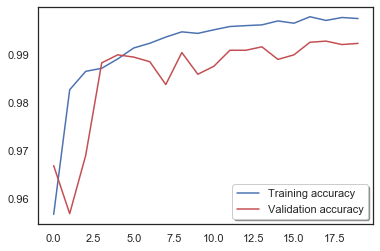

In [19]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [18]:
history = model.fit(X, Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 42000 samples, validate on 4200 samples
Epoch 1/20
42000/42000 [==============================] - 703s 17ms/sample - loss: 0.1245 - accuracy: 0.9634 - val_loss: 0.0609 - val_accuracy: 0.9824
Epoch 2/20
42000/42000 [==============================] - 639s 15ms/sample - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0283 - val_accuracy: 0.9907
Epoch 3/20
42000/42000 [==============================] - 640s 15ms/sample - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0609 - val_accuracy: 0.9826
Epoch 4/20
42000/42000 [==============================] - 680s 16ms/sample - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0211 - val_accuracy: 0.9943
Epoch 5/20
42000/42000 [==============================] - 667s 16ms/sample - loss: 0.0290 - accuracy: 0.9913 - val_loss: 0.0249 - val_accuracy: 0.9905
Epoch 6/20
42000/42000 [==============================] - 644s 15ms/sample - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0156 - val_accuracy: 0.9952
Epoch 7/20
42000/42000 [=====================

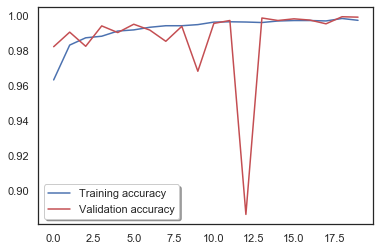

In [19]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [20]:
y_predict = model.predict_classes(test)
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)),
                         "Label": y_predict})
submissions.to_csv("submission2.csv", index=False, header=True)

In [21]:
#Setting up our model
#Model 1
#Submission 4

model = Sequential([
    Conv2D(filters = 32, kernel_size = (4,4), activation = "relu", strides = (1,1), padding = "same", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), padding = "same"),
    Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", strides = (1,1), padding = "same"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax"),
])

In [22]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [23]:
history = model.fit(X, Y, epochs = 20, validation_data = (val_X, val_Y))

Train on 42000 samples, validate on 4200 samples
Epoch 1/20
42000/42000 [==============================] - 71s 2ms/sample - loss: 0.1778 - accuracy: 0.9456 - val_loss: 0.0546 - val_accuracy: 0.9836
Epoch 2/20
42000/42000 [==============================] - 52s 1ms/sample - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 3/20
42000/42000 [==============================] - 52s 1ms/sample - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 4/20
42000/42000 [==============================] - 55s 1ms/sample - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0249 - val_accuracy: 0.9924
Epoch 5/20
42000/42000 [==============================] - 56s 1ms/sample - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0163 - val_accuracy: 0.9938
Epoch 6/20
42000/42000 [==============================] - 55s 1ms/sample - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0082 - val_accuracy: 0.9971
Epoch 7/20
42000/42000 [==============================] -

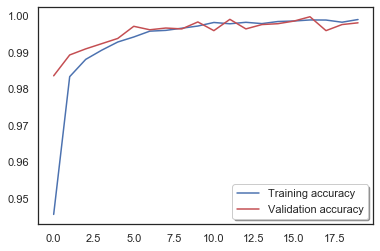

In [24]:
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

In [25]:
y_predict = model.predict_classes(test)
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)),
                         "Label": y_predict})
submissions.to_csv("submission3.csv", index=False, header=True)

In [26]:
#Setting up our model
#Model 1
model = Sequential([
    Conv2D(filters = 32, kernel_size = (4,4), activation = "relu", strides = (1,1), padding = "same", input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2), padding = "same"),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", strides = (1,1), padding = "same"),
    MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(512, activation = "relu"),
    Dropout(0.25),
    Dense(10, activation = "softmax"),
])

In [27]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X, Y, epochs history = model.fit(X, Y, epochs = 20, validation_data = (val_X, val_Y))= 20)

Train on 42000 samples
Epoch 1/20
 7296/42000 [====>.........................] - ETA: 2:16 - loss: 0.4852 - accuracy: 0.8464